### Logistics Regression

Step 1: import python Libraries
-   အခုတစ်ခါမှာတော့ ကျွန်တော်တို့က Regression (ကိန်းဂဏန်းခန့်မှန်းခြင်း) ကနေ Classification (အမျိုးအစားခွဲခြားခြင်း) ဘက်ကို ကူးပြောင်းလေ့လာတော့မှာ ဖြစ်ပါတယ်။ ဒီနေရာမှာ အဓိကသုံးမယ့် Algorithm ကတော့ Logistic Regression ဖြစ်ပါတယ်။

In [1]:
import pandas as pd       

Step 2: (Importing the Dataset)
-   အခု ကျွန်တော်တို့ အသုံးပြုမယ့် Dataset ကတော့ Social Network Ads ဖြစ်ပါတယ်။ ဒါက လူတစ်ယောက်ရဲ့ အသက် (Age) နဲ့ ခန့်မှန်းလစာ (Estimated Salary) ပေါ်မူတည်ပြီး သူဟာ ကြော်ငြာထားတဲ့ ပစ္စည်း (ဥပမာ- ကား) ကို ဝယ်ယူခြင်း ရှိ/မရှိ (Purchased: 0 သို့မဟုတ် 1) ကို ခွဲခြားပေးမယ့် Classification ပုစ္ဆာ ဖြစ်ပါတယ်။

In [2]:
# IMPORTING THE DATASET
social_N_data = pd.read_csv(r'C:\Users\ThinkBook\Desktop\AI\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\groupB\hak_logistic_regression\diabetes.csv')

display(social_N_data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####   # --- Method 1: Sigmoid Curve (Age တစ်ခုတည်းကို သုံးမယ်) ---

Step 3: Features ခွဲထုတ်ခြင်းနှင့် Train-Test Split (Preparing for Sigmoid)
-   Classification လုပ်တဲ့အခါမှာ Logistic Regression ရဲ့ သဘောတရားကို အလွယ်ကူဆုံးမြင်နိုင်ဖို့အတွက် ပထမဆုံးအနေနဲ့ "အသက် (Age)" တစ်ခုတည်းကိုပဲ Feature အဖြစ် သုံးပြီး စမ်းသပ်ကြည့်မှာ ဖြစ်ပါတယ်။

In [5]:
from sklearn.model_selection import train_test_split 
 
# ခန့်မှန်းလိုသည့် အဖြေ (Target) ကို y အဖြစ် သတ်မှတ်ခြင်း
y = social_N_data['Pregnancies'].values

# --- Method 1: Age တစ်ခုတည်းကို သုံးပြီး Sigmoid Curve ထွက်လာပုံကို လေ့လာခြင်း ---
X1 = social_N_data[['BloodPressure']].values

# Data ကို သင်ကြားရန် (Train) နှင့် စမ်းသပ်ရန် (Test) ဟူ၍ အချိုးကျ ခွဲထုတ်ခြင်း
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=0)

Step 4: Logistic Regression Model ကို training ‌ပေးခြင်း
-   ယခုအဆင့်မှာတော့ Features ထဲက "အသက် (Age)" တစ်ခုတည်းကို အသုံးပြုပြီး Logistic Regression Model ကို စတင် train လိုက်ပြီ ဖြစ်ပါတယ်။ ဒီ Model ကနေတစ်ဆင့် အသက်အရွယ်အလိုက် ဝယ်ယူနိုင်ခြေ (Probability) ကို တွက်ချက်ပေးမယ့် Sigmoid Function ပုံသေနည်းကို ရှာဖွေသွားမှာပါ။

In [7]:
from sklearn.linear_model import LogisticRegression   

model_1d = LogisticRegression()

model_1d.fit(X1_train, y1_train)

c:\Users\ThinkBook\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Step 5: Model ၏ တိကျမှုကို စစ်ဆေးခြင်း (Accuracy Assessment)
-   ယခုအဆင့်တွင် Model မမြင်ဖူးသေးသော ဒေတာအသစ်များ (X1_test) ကို ပေး၍ ခန့်မှန်းခိုင်းပြီး၊ တကယ့်အဖြေမှန် (y1_test) နှင့် တိုက်စစ်ကာ တိကျမှု (Accuracy) မည်မျှရှိသည်ကို တိုင်းတာခြင်းဖြစ်ပါသည်။

In [8]:
from sklearn.metrics import accuracy_score             

# Model မမြင်ဖူးသေးသော Test Data များအပေါ် မူတည်၍ ခန့်မှန်းခြင်း
y1_pred = model_1d.predict(X1_test)

# ခန့်မှန်းချက်များနှင့် အဖြေမှန်များကို နှိုင်းယှဉ်၍ Accuracy တွက်ခြင်း
acc_1d = accuracy_score(y1_test, y1_pred)

print(f"Accuracy with Age only: {acc_1d :.2f}")

Accuracy with Age only: 0.17


Step 6: Sigmoid Curve ကို ပုံဖော်ခြင်း (Visualizing the Probability)
-   Logistic Regression ရဲ့ ထူးခြားချက်ကတော့ Linear Regression လို မျဉ်းဖြောင့်ကြီး မဟုတ်ဘဲ "S" ပုံသဏ္ဍာန် Sigmoid Curve ထွက်လာတာ ဖြစ်ပါတယ်။ ဒီ Curve က အသက် (Age) အလိုက် ဝယ်ယူနိုင်ခြေ (Probability) ဘယ်လောက်ရှိလဲဆိုတာကို ၀ နဲ့ ၁ ကြားမှာ ပြသပေးပါတယ်။

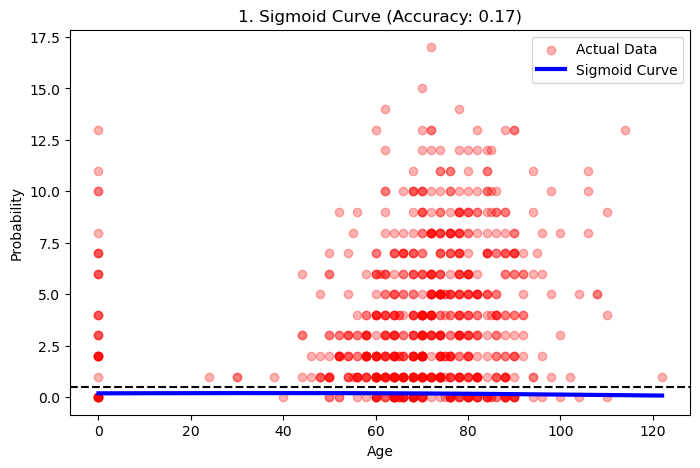

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Curve Plot
plt.figure(figsize=(8, 5))

# အသက်အနည်းဆုံးမှ အများဆုံးအထိ အမှတ် ၃၀၀ ကို ဖန်တီးခြင်း 
X_range = np.linspace(X1.min(), X1.max(), 300).reshape(-1, 1)

# predict_proba ကို သုံးပြီး ဝယ်ယူနိုင်ခြေ (Class 1 ဖြစ်နိုင်ခြေ) ကို တွက်ချက်ခြင်း
probs = model_1d.predict_proba(X_range)[:, 1]

# မူလဒေတာများကို အစက်ချခြင်း (၀ နှင့် ၁ နေရာများတွင်သာ ရှိမည်)
plt.scatter(X1, y, color='red', alpha=0.3, label='Actual Data')

# Sigmoid Curve ဆွဲခြင်း
plt.plot(X_range, probs, color='blue', linewidth=3, label='Sigmoid Curve')

# Threshold line (0.5) ကို ဆွဲခြင်း - ဤမျဉ်းအထက်ရောက်လျှင် ဝယ်မည်ဟု Model က ဆုံးဖြတ်သည်
plt.axhline(y=0.5, color='black', linestyle='--')

plt.title(f'1. Sigmoid Curve (Accuracy: {acc_1d:.2f})')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()
plt.show()